# Prediction of Wine type using Deep Learning

In [2]:
import warnings
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
warnings.filterwarnings("ignore")

# Importing the dataset

In [3]:
df = pd.read_csv('https://archive.ics.uci.edu/static/public/109/data.csv')
df.rename(columns = {'class':'Type'}, inplace = True)

In [4]:
df.head()

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline,Type
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Alcohol                       178 non-null    float64
 1   Malicacid                     178 non-null    float64
 2   Ash                           178 non-null    float64
 3   Alcalinity_of_ash             178 non-null    float64
 4   Magnesium                     178 non-null    int64  
 5   Total_phenols                 178 non-null    float64
 6   Flavanoids                    178 non-null    float64
 7   Nonflavanoid_phenols          178 non-null    float64
 8   Proanthocyanins               178 non-null    float64
 9   Color_intensity               178 non-null    float64
 10  Hue                           178 non-null    float64
 11  0D280_0D315_of_diluted_wines  178 non-null    float64
 12  Proline                       178 non-null    int64  
 13  Type 

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malicacid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Alcalinity_of_ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Total_phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoid_phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
Color_intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


In [7]:
df.isnull().sum()

Alcohol                         0
Malicacid                       0
Ash                             0
Alcalinity_of_ash               0
Magnesium                       0
Total_phenols                   0
Flavanoids                      0
Nonflavanoid_phenols            0
Proanthocyanins                 0
Color_intensity                 0
Hue                             0
0D280_0D315_of_diluted_wines    0
Proline                         0
Type                            0
dtype: int64

In [8]:
df.Type.unique()

array([1, 2, 3], dtype=int64)

In [9]:
df['Alcohol'].value_counts()

Alcohol
13.05    6
12.37    6
12.08    5
12.29    4
12.42    3
        ..
13.72    1
13.29    1
13.74    1
13.77    1
14.13    1
Name: count, Length: 126, dtype: int64

In [10]:
sns.set_theme(style="whitegrid")
sns.scatterplot(data=df, x="volatile acidity", y="fixed acidity", hue="Type")

ValueError: Could not interpret value `volatile acidity` for `x`. An entry with this name does not appear in `data`.

<Axes: xlabel='citric acid', ylabel='fixed acidity'>

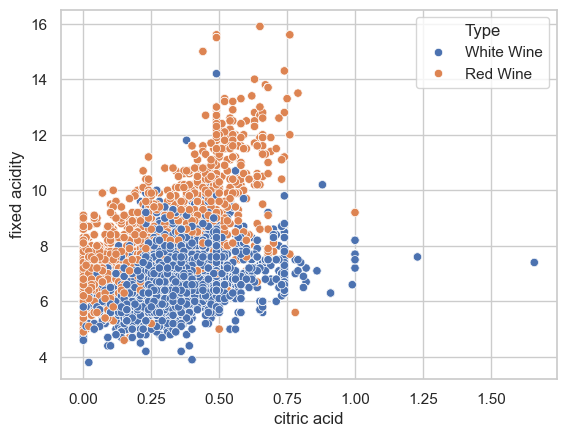

In [ ]:
sns.scatterplot(data=df, y='fixed acidity', x='citric acid', color='Purple', hue='Type')

<Axes: xlabel='density', ylabel='fixed acidity'>

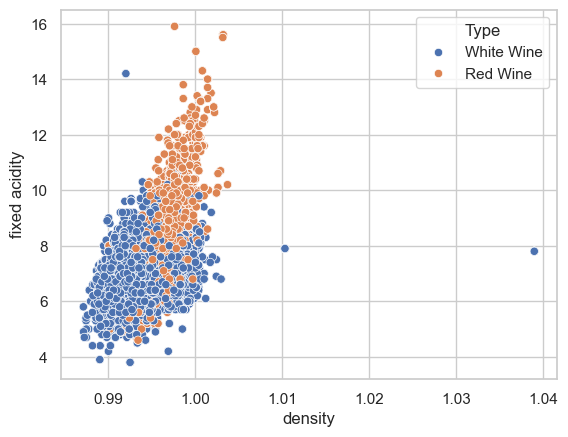

In [ ]:
sns.scatterplot(data=df, y='fixed acidity', x='density', color='Purple', hue='Type')

<Axes: xlabel='citric acid', ylabel='volatile acidity'>

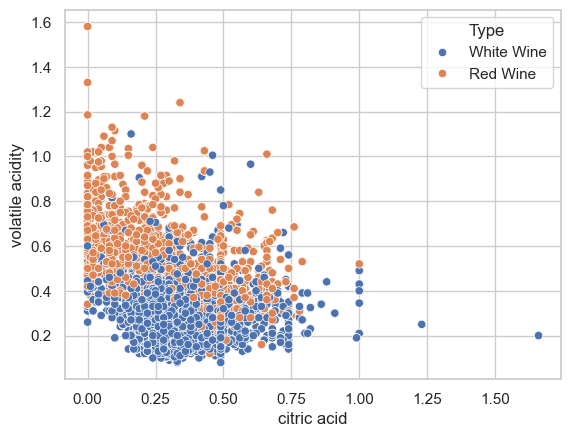

In [ ]:
sns.scatterplot(data=df, y='volatile acidity', x='citric acid', color='Purple', hue='Type')


<Axes: xlabel='total sulfur dioxide', ylabel='free sulfur dioxide'>

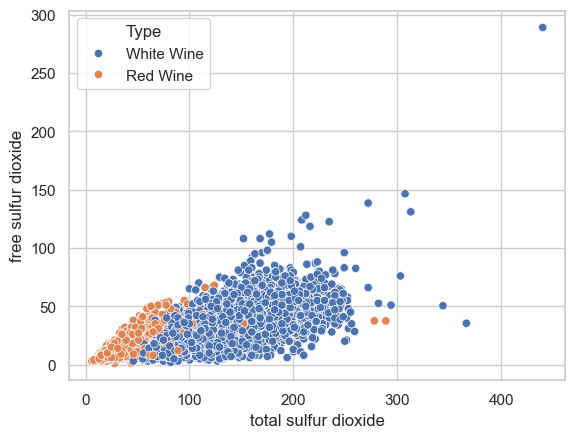

In [ ]:
sns.scatterplot(data=df, y='free sulfur dioxide', x='total sulfur dioxide', color='Purple', hue='Type')

<Axes: xlabel='density', ylabel='pH'>

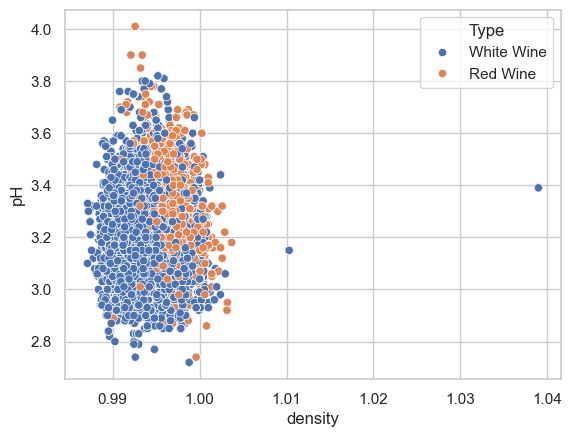

In [ ]:
sns.scatterplot(data=df, x='density', y='pH', color='Purple', hue='Type')

<Axes: xlabel='density', ylabel='residual sugar'>

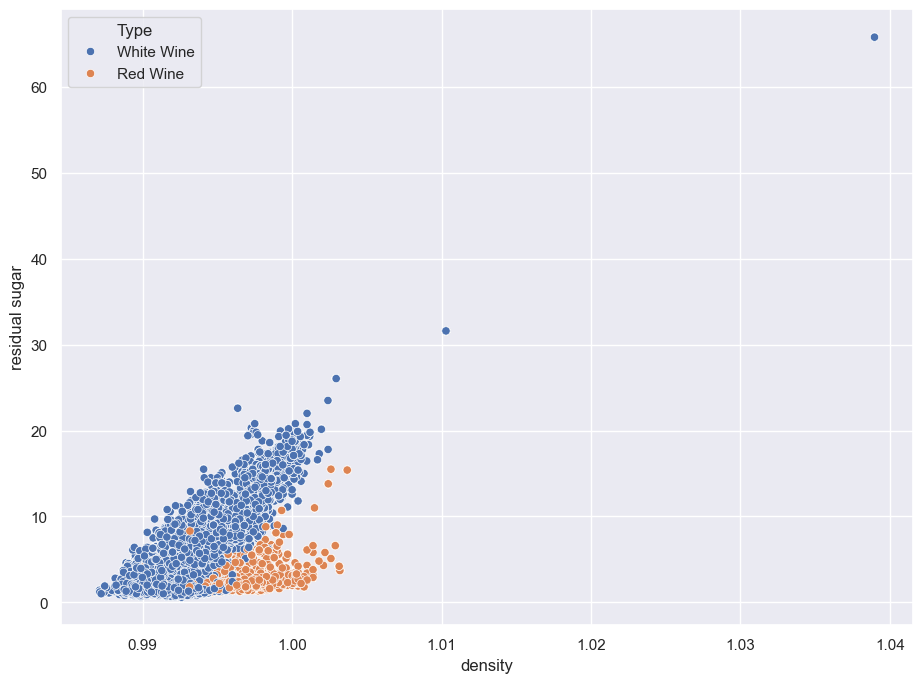

In [ ]:
sns.scatterplot(data=df, x='density', y='residual sugar', color='Purple', hue='Type')

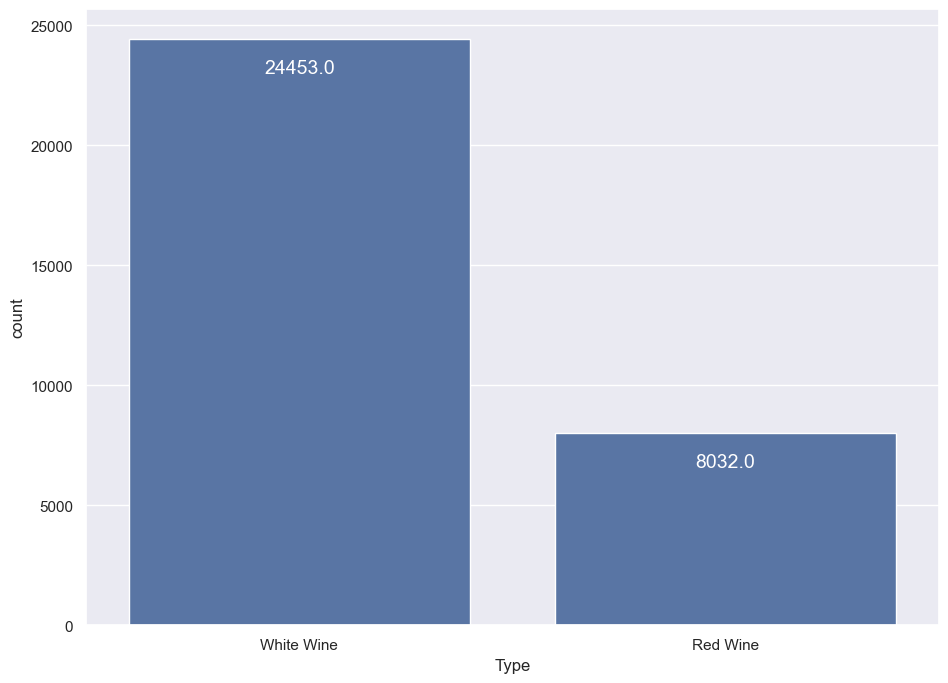

In [ ]:
sns.set_theme(rc={"figure.figsize":(11, 8)})
ax = sns.countplot(x="Type",data=df)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', va='top', color='white', size=14)

# Encoding the target variable

In [ ]:
typeEncoder = {
    'Barolo' : 1,
    'Grignolino' : 2,
    'Barbera' : 3
}

df.head()

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline,Type
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


# Correlation matrix

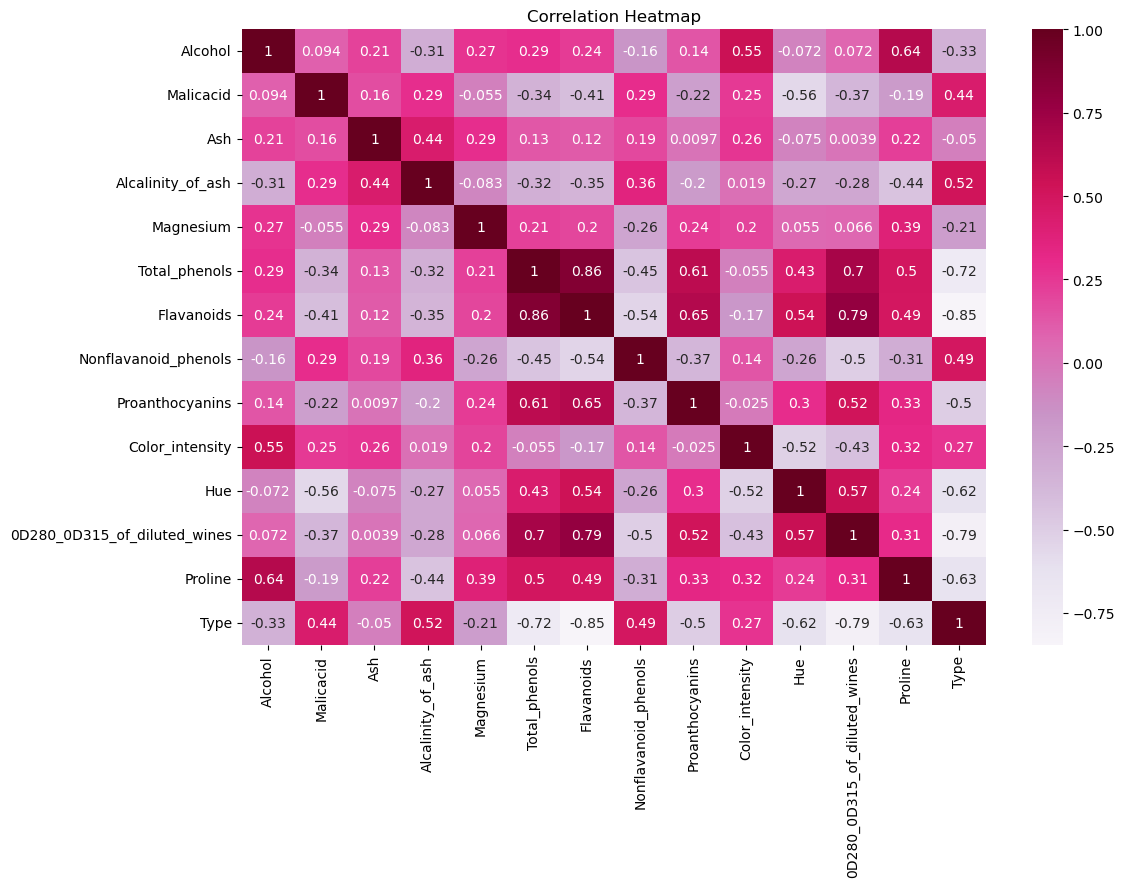

In [ ]:
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="PuRd")
plt.title("Correlation Heatmap")
plt.show()

# Splitting the dataset into the Training set and Test set

In [11]:
x = df.drop(columns='Type')
y = df['Type']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [12]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
model=RandomForestRegressor()
model.fit(x_train, y_train)
preds_valid=model.predict(x_test)
score_valid=mean_absolute_error(y_test,preds_valid)
print("MAE: ",score_valid)

MAE:  0.09916666666666665


In [13]:
x_test.head()

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
54,13.74,1.67,2.25,16.4,118,2.60,2.90,0.21,1.62,5.85,0.92,3.20,1060
151,12.79,2.67,2.48,22.0,112,1.48,1.36,0.24,1.26,10.80,0.48,1.47,480
63,12.37,1.13,2.16,19.0,87,3.50,3.10,0.19,1.87,4.45,1.22,2.87,420
55,13.56,1.73,2.46,20.5,116,2.96,2.78,0.20,2.45,6.25,0.98,3.03,1120
123,13.05,5.80,2.13,21.5,86,2.62,2.65,0.30,2.01,2.60,0.73,3.10,380


In [14]:
#Generate Test Prediction
preds_test=model.predict(x_test)
submission=pd.DataFrame({'Index':x_test.index,'Type':preds_test})
submission.to_csv('submission.csv',index=False)

In [15]:
import joblib

# save
joblib.dump(model, "model.pkl") 

# # load
# clf2 = joblib.load("model.pkl")

# clf2.predict(X[0:1])

['model.pkl']